# DESIGN AND DEVELOPMENT OF POWER SUPPLY FOR ART SPOTLIGHTS

## ABSTRACT
## INTRODUCTION
Lighting plays a critical role in the presentation of artwork, as it not only illuminates the pieces but also enhances their visual impact and overall ambience of the display environment. Spotlights are particularly effective for the purpose, as they provide focused and controlled beams of light that draw attention to individual art pieces. Proper lighting ensures that the details, texture, and color of the artwork are clearly visible, while also creating an aesthetic atmosphere that compliments the gallery or exhibition space.

In this project, the goal is to design a custom spotlight system using light-emitting diodes (LEDs) to illuminate art pieces. Each art piece will be highlighted using two LEDs, ensuring uniform brightness and energy efficiency. LEDs are selected due to their advantages such as low power consumption, compact size, long lifespan, and their ability to provide bright white light suitable for highlighting artwork. A total of ten art pieces will be displayed, requiring 20 LEDs in the entire system.

Since LEDs operate on DC at a voltage of approximately 3 - 3.3 V while the available power supply from a standard socket si 240 V AC, a conversion stage is required. This is achieved by designing a power board that converts AC to a stable DC supply. The power board ensures safe and reliable operation of the LEDs while preventing damage due to overvoltage or fluctuations. From the power board, small load boards are developed, each consisting of 2 LEDs and a parallel resistors to regulate voltage and current.

By creating this modular system - comprising a central power conversion unit and LED load boards - the project provides a practical, efficient and, scalable approach to spotlighting for art displays. The design balances functionality and safety making it well suited for gallery installations or similar applications.

## Literature Review
Each LED has a forward voltage drop, which depends on its material and color. White LEDs typically have a forward voltage of about 3 - 3.3 V. To operate, an LED must be supplied with at least this forward voltage and any excess voltage must be controlled to prevent overheating or damage. The current-voltage characteristics of LED is highly nonlinear. A small change in applied voltage can cause a large change in current. Without proper control, this can exceed the LEDs maximum rated current, leading to failure. hence, current limiting is essential in LED circuit.
Resistors are used in series with LEDs to limit the current flowing through them. Since an LED's voltage drop is almost constant when conducting, the resistor absorbs the excess voltage and ensures a safe current level. Using Ohm's law:
$$ R = \frac{V_s - V_F}{I_f} $$
where $V_s$ is supply voltage, $V_f$ is the forward voltage and $I_f$ is the desired forward current typically 20 - 30 mA. This ensures reliable operation and prevents thermal damage.

The power from the wall socket is 240 VAC, which cannot directly drive LEDs. Therefore, a conversion system is required in the steps below:
1. Transformer: A step-down transformer is often used to reduce 240 VAC to a safer, lower AC voltage before rectification.
2. Rectification: AC is first passed through a rectifier, typically a bridge rectifier, that converts alternating current into pulsating DC.
3. Filtering: A capacitor filter smooths the pulsating DC into a more stable form, reducing ripples.
4. Voltage regulation: The filtered DC may still vary with load and input fluctuations. A voltage regulator or a buck converter is used to provide a constant stable output.
Linear regulators are simple but inefficient because excess voltage is dissipated as heat. In contrast, a buck converter is a switching regulator that efficiently steps down the voltage with minimal heat loss. For this project, a buck converter is the better choice since it can efficiently convert VAC down to 5 VDC which can then safely drive the LEDs with resistors for current limiting.

## Methodology
### Powerboard
1. System specifications.
    - Input: 240 VAC from socket supply.
    - Output: 12 VDC capable of supplying up to 2 A.
    - Requirement: Stable output with minimal ripple.
2. Transformer stage
The power board should supply 12 V, 2 A DC power. Power output of the board:
$$ P_{out} = V \cdot I $$
resulting to required power output of 24 W. When rectifying AC to DC and using capacitors, there are losses. Taking 75% efficiency of the system, the required output from the transformer was calculated as:
$$ P_{in} = \frac{P_{out}}{\eta} $$
resulting to 32 W. To achieve the required regulated voltage of 12 V
$$ V_{DC} = (V_{ac} \cdot \sqrt{2}) - 2 \cdot V_{diode} $$
The $V{diode}$ is approximately 0.7 V hence $V_{ac}$ is 9.5 V given by:
$$ V_{ac} = \frac{12 + 1.4}{1.414} = 9.5 V $$
But under load, ripple and buck adjustments a margin is required hence a 12 VAC transformer will be sufficient. The required current is up to 2 A. The $ I_{ac} $ can be calculated as:
$$ I_{ac} = 1.2 \times I_{DC} $$
resulting to 2.4 A. Hence the transformer specifications should be:
    - Input: 240 V 50 Hz
    - Output: 12 V, 3A
    - Output power: 36 V/A
### Simulation results of transformer stage
Software tool: EasyEDA (Standard version - Simulation mode)
Parameters:
- Input voltage: 240 V, 50 Hz AC.
- Transformer: Center-tapped transformer with ration 10:1.

Using center-tap, the simulated output is 16.961 V as in the image below:
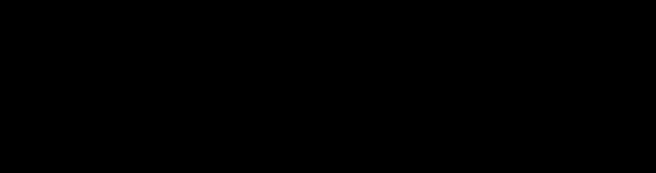
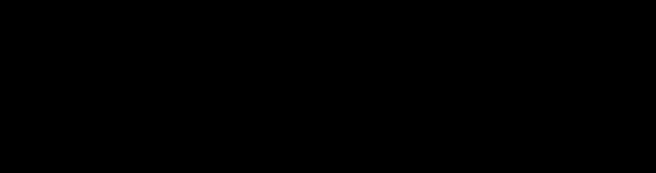
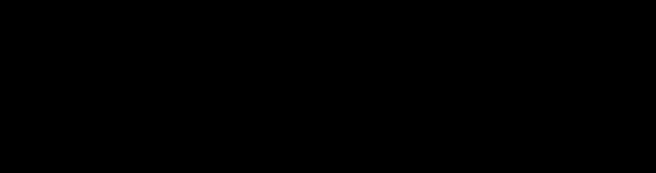

<!-- Local files in the same folder -->
<p align="center">
  <img src="Schematic_CT_TRANSFORMER_2025-08-28.png" alt="Right Image" width="45%" style="display:inline-block;"/>
  <img src="oscilloscope.svg" alt="Left Image" width="45%" style="display:inline-block;"/>
</p>


Ignoring center-tap, the simulated output is 33.931 V as in the image below:

<!-- Local files in the same folder -->
<p align="center">
  <img src="Full CT schematic.png" alt="Left Image" width="45%" style="display:inline-block;"/>
  <img src="oscilloscope_full.svg" alt="Right Image" width="45%" style="display:inline-block;"/>

</p>

To protect the transformer from excessive current, a fuse is used. The rating of the fuse is slightly higher than the primary current. The primary current, $I_p$, is given by:
$$ I_p = \frac{P_{out}}{V_s \times \eta}$$
where transformer efficiency, $\eta$ is 0.75, power needed by secondary coil of transformer, $P_{out}$ is 24W and supply voltage is 240V resulting to $I_p$ of 0.13A. Therefore, the fuse rating is 0.5A in this case a 0.5 A quick blow fuse.
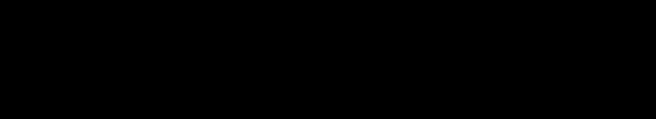
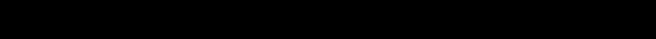
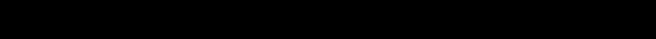
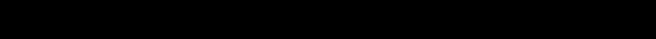

3. Rectifier stage
This stage converts the reduced AC to variable DC. The rectifier used is CT full wave rectifier with 2 power diodes (1N4003). The transformer output used was center-tapped with 12 VAC on  each half and the center tap connected as ground. The peak voltage from the secondary winding was calculated as:
$$ V_p = V_{rms} \times \sqrt{2} $$
where $V_{rms}$ from simulation was 17 V resulting to peak voltage of 24 V. This can be observed from the waveform of the transformer connection using the center tap.
While using the center-tap full wave rectifier the voltage drop across the diode is 0.7 V. The DC voltage after rectifier was calculated as:
$$ V_{VDC} = V_p - V_D $$
where $ V_D$ is the voltage drop across each diode on each half resulting to 23 V after rectification.

### Simulation results at rectification stage
The output voltage after rectification was observed to be 17.635 V with a ripple of about 15 V as shown in the images below:

<!-- Local files in the same folder -->
<p align="center">
  <img src="Rectifier schematic.png" alt="Left Image" width="45%" style="display:inline-block;"/>
  <img src="oscilloscope Rectifier.svg" alt="Right Image" width="45%" style="display:inline-block;"/>

</p>

4. Smoothening stage

A capacitor reduces ripple voltage under load. The capacitance required for smoothening was calculated as:
$$ C = \frac{I}{2 \cdot f \cdot \delta V} $$
where $I$ is load current (1 A) $f$ is mains frequency (50 Hz) and $\delta V$ is allowable ripple of about 1 V resulting to a capacitance of 0.01 F or 10,000 $\mu$F
### Simulation results for smoothening stage


<!-- Local files in the same folder -->
<p align="center">
  <img src="SMOOTH.png" alt="Left Image" width="45%" style="display:inline-block;"/>
  <img src="oscilloscope SMOOTH.svg" alt="Right Image" width="45%" style="display:inline-block;"/>

</p>

5. Filtering stage.
This stage cuts high-frequency noise using RC filter at a cut-off frequency of 5 Hz. The resistor value was set at 100 $\Omega$. This allows to achieve a voltage of 12 V. The capacitance was calculated as:
$$ C = \frac{1}{2\pi \cdot R \cdot f_c} $$
where $ R $ is resistance (100 $\Omega$) and $f_c$ is cut-off frequency (5 Hz) resulting to 318 $\mu F$.

<!-- Local files in the same folder -->
<p align="center">
  <img src="Filter schematic.png" alt="Left Image" width="45%" style="display:inline-block;"/>
  <img src="oscilloscope filter.svg" alt="Right Image" width="45%" style="display:inline-block;"/>

</p>

## Voltage Regulation
From the simulations, the voltage output after rectification and filtering was 22.8V. A buck converter was used to regulate the voltage to the required according to the consumer's needs. The buck converter reduces higher DC voltage to a lower one. In this project the required was about 5V output. Further, an LED is used to indicate DC power is present.

## Circuit Schematic and PCB Design
The power board circuit schematic is shown below.

<!-- Local files in the same folder -->
<p align="center">
  <img src="Schematic_POWER-SUPPLY_2025-09-18.svg"1 width="100%" style="display:inline-block;"/>
</p>

The PCB designs in rectangular and circular shapes are shown below;

<!-- Local files in the same folder -->
<p align="center">
  <img src="PCB_PCB_POWER-SUPPLY_2025-09-18.svg" alt="Left Image" width="45%" style="display:inline-block;"/>
  <img src="PCB_PCB_POWER-SUPPLY_3_2025-09-18.svg" alt="Right Image" width="45%" style="display:inline-block;"/>

</p>

## Load circuit
An LED has rated voltage of 20 mA and 3 V. The buck converter output was set to 5 V. From Ohm's law, the resistor value was calculated as:
$$ R = \frac{V}{I} $$
resulting to 250 $\Omega$.
## Load Circuit Schematic and PCB Design
The load circuit consists of 2 LED connected in parallel.

<!-- Local files in the same folder -->
<p align="center">
  <img src="PCB_PCB_POWER-SUPPLY_2_2025-09-18.svg" alt="Left Image" width="45%" style="display:inline-block;"/>
  <img src="Schematic_POWER-SUPPLY_2025-09-18.svg" alt="Right Image" width="45%" style="display:inline-block;"/>

</p>

## Circuit enclosures
The circuit boards enclosures were designed on Autodesk Inventor as shown in the orthographic views below.
## Power board enclosure


<!-- Local files in the same folder -->
<p align="center">
  <img src="ROUNDCIRCUITBOARD.png" alt="Left Image" width="45%" style="display:inline-block;"/>
  <img src="CIRCUIT_CASING.png" alt="Right Image" width="45%" style="display:inline-block;"/>

</p>